In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle

In [2]:
data = pd.read_excel(r"C:\Users\tpsna\Downloads\Copper_Set.xlsx")

In [3]:
data

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,0000000000000000000000000000000001000777,164141591,20200701.0,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,0000000000000000000000000000000001000227,164141591,20200701.0,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,0000000000000000000000000000000001004216,164141591,20200701.0,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,20200701.0,601.00


In [4]:
data.shape

(181673, 14)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [6]:
data.isna().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [7]:
data.describe(exclude=object).T


,count,mean,std,min,25%,50%,75%,max
item_date,181672.0,2.020459e+07,4.551119e+03,19950000.00,20200929.0,20201130.0,2.021020e+07,2.021040e+07
customer,181672.0,3.051221e+07,2.433382e+07,12458.00,30196884.0,30205242.0,3.028042e+07,2.147484e+09
country,181645.0,4.489302e+01,2.440421e+01,25.00,26.0,30.0,7.800000e+01,1.130000e+02
application,181649.0,2.561581e+01,1.775417e+01,2.00,10.0,15.0,4.100000e+01,9.900000e+01
thickness,181672.0,2.564827e+00,6.572321e+00,0.18,0.7,1.5,3.000000e+00,2.500000e+03
width,181673.0,1.295287e+03,2.616318e+02,1.00,1180.0,1250.0,1.500000e+03,2.990000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,611728.00,611993.0,640665.0,1.332077e+09,1.722208e+09
delivery date,181672.0,2.020738e+07,2.411059e+04,20190401.00,20201101.0,20210101.0,2.021040e+07,3.031010e+07
selling_price,181672.0,1.918036e+03,3.317956e+05,-1160.00,669.0,812.0,9.530000e+02,1.000010e+08


In [8]:
columns_to_convert_numeric = ["quantity tons", "customer", "country", "application", "thickness", "width", "selling_price"]
data[columns_to_convert_numeric] = data[columns_to_convert_numeric].apply(pd.to_numeric, errors="coerce")


In [9]:
columns_to_convert_datetime = ['item_date', 'delivery date']
for i in columns_to_convert_datetime:
    data[i] = pd.to_datetime(data[i], format='%Y%m%d', errors='coerce').dt.date


In [10]:
data.loc[data['material_ref'].str.contains(r'0{10,}', na=False), 'material_ref'] = np.nan

In [11]:
data.isna().sum()


id                    2
item_date             3
quantity tons         1
customer              1
country              28
status                2
item type             0
application          24
thickness             1
width                 0
material_ref     100610
product_ref           0
delivery date         3
selling_price         1
dtype: int64

In [12]:
data=data.drop(['id'],axis=1)

In [13]:
columns_mean = ["quantity tons" , "thickness", "width", "selling_price"]
means = data[columns_mean].mean()
data[columns_mean] = data[columns_mean].fillna(means)

In [14]:
columns_mode = ['item_date', 'status', 'delivery date', 'customer', 'country', 'item type', 'application', 'material_ref', 'product_ref']
modes = data[columns_mode].mode().iloc[0]
data[columns_mode] = data[columns_mode].fillna(modes)


In [15]:
data.isna().sum()


item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   item_date      181673 non-null  object 
 1   quantity tons  181673 non-null  float64
 2   customer       181673 non-null  float64
 3   country        181673 non-null  float64
 4   status         181673 non-null  object 
 5   item type      181673 non-null  object 
 6   application    181673 non-null  float64
 7   thickness      181673 non-null  float64
 8   width          181673 non-null  float64
 9   material_ref   181673 non-null  object 
 10  product_ref    181673 non-null  int64  
 11  delivery date  181673 non-null  object 
 12  selling_price  181673 non-null  float64
dtypes: float64(7), int64(1), object(5)
memory usage: 18.0+ MB


In [17]:
data['country'] = data['country'].astype(np.int64)


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   item_date      181673 non-null  object 
 1   quantity tons  181673 non-null  float64
 2   customer       181673 non-null  float64
 3   country        181673 non-null  int64  
 4   status         181673 non-null  object 
 5   item type      181673 non-null  object 
 6   application    181673 non-null  float64
 7   thickness      181673 non-null  float64
 8   width          181673 non-null  float64
 9   material_ref   181673 non-null  object 
 10  product_ref    181673 non-null  int64  
 11  delivery date  181673 non-null  object 
 12  selling_price  181673 non-null  float64
dtypes: float64(6), int64(2), object(5)
memory usage: 18.0+ MB


In [19]:
data

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,2021-04-01,54.151139,30156308.0,28,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00
1,2021-04-01,768.024839,30202938.0,25,Won,W,41.0,0.80,1210.0,DX51D+Z,1668701718,2021-04-01,1047.00
2,2021-04-01,386.127949,30153963.0,30,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33
3,2021-04-01,202.411065,30349574.0,32,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00
4,2021-04-01,785.526262,30211560.0,28,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,2020-07-02,102.482422,30200854.0,25,Won,W,41.0,0.96,1220.0,DX51D+Z,164141591,2020-07-01,591.00
181669,2020-07-02,208.086469,30200854.0,25,Won,W,41.0,0.95,1500.0,DX51D+Z,164141591,2020-07-01,589.00
181670,2020-07-02,4.235594,30200854.0,25,Won,W,41.0,0.71,1250.0,DX51D+Z,164141591,2020-07-01,619.00
181671,2020-07-02,-2000.000000,30200854.0,25,Won,W,41.0,0.85,1250.0,DX51D+Z,164141591,2020-07-01,601.00


In [20]:
data.shape

(181673, 13)

EXPLORATORY DATA ANALYSIS:

In [21]:
data_eda=data.copy(True)

In [ ]:
# Define the columns to plot
columns_to_plot = [
    'quantity tons', 'customer', 'country', 
    'application', 'thickness', 'width', 'selling_price'
]

fig, axes = plt.subplots(len(columns_to_plot), 2, figsize=(15, 30))

for i, column in enumerate(columns_to_plot):
    sns.boxplot(ax=axes[i, 0], data=data_eda[column])
    axes[i, 0].set_title(f'{column} - Outliers')
    
    sns.histplot(ax=axes[i, 1], data=data_eda[column], kde=True)
    axes[i, 1].set_title(f'{column} - Distribution')

plt.tight_layout()
plt.show()


In [22]:
out_skew_data=data_eda.copy(True)


In [23]:
skewed_columns = ['quantity tons', 'thickness', 'width', 'selling_price']
for column in skewed_columns:
    neg = (out_skew_data[column] <= 0)
    print(f'{column} : {neg.sum()} ')
    out_skew_data.loc[neg,column] = np.nan

quantity tons : 4 
thickness : 0 
width : 0 
selling_price : 7 


In [24]:
out_skew_data.isna().sum()

item_date        0
quantity tons    4
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    7
dtype: int64

In [37]:
out_skew_data.dropna(inplace=True)

In [38]:
out_skew_data.isna().sum()


item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [39]:
# Filter only numeric columns
numeric_columns = out_skew_data.select_dtypes(include=['number'])
# Calculate skewness for numeric columns
skewness_values = numeric_columns.skew()
print(skewness_values)


quantity tons    424.677959
customer          86.982674
country            0.753023
application        0.724614
thickness         15.291371
width              0.374564
product_ref        1.015276
selling_price    301.378964
dtype: float64


In [40]:
outlier_columns = ['quantity tons', 'thickness', 'width', 'selling_price']

before_stats = out_skew_data[outlier_columns].describe()

for column in outlier_columns:
    Q1 = out_skew_data[column].quantile(0.30)  # 30th percentile
    Q3 = out_skew_data[column].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR  # Lower bound for outlier detection
    upper_bound = Q3 + 1.5 * IQR  # Upper bound for outlier detection
    out_skew_data = out_skew_data[(out_skew_data[column] >= lower_bound) & (out_skew_data[column] <= upper_bound)]

after_stats = out_skew_data[outlier_columns].describe()

print("Summary statistics before removing outliers:")
print(before_stats)
print("\nSummary statistics after removing outliers:")
print(after_stats)



Summary statistics before removing outliers:
       quantity tons      thickness          width  selling_price
count   1.816620e+05  181662.000000  181662.000000   1.816620e+05
mean    5.875291e+03       2.551133    1295.289042   1.918156e+03
std     2.349146e+06       2.977116     261.638547   3.318048e+05
min     1.000000e-05       0.180000       1.000000   1.000000e-01
25%     1.097088e+01       0.700000    1180.000000   6.690000e+02
50%     3.036501e+01       1.500000    1250.000000   8.120000e+02
75%     6.716141e+01       3.000000    1500.000000   9.530000e+02
max     1.000000e+09     400.000000    2990.000000   1.000010e+08

Summary statistics after removing outliers:
       quantity tons      thickness          width  selling_price
count  132631.000000  132631.000000  132631.000000  132631.000000
mean       35.586278       1.803089    1265.155654     841.050729
std        31.885531       1.441616     174.815790     189.197046
min         0.000010       0.180000     855.000000  

<function matplotlib.pyplot.show(close=None, block=None)>

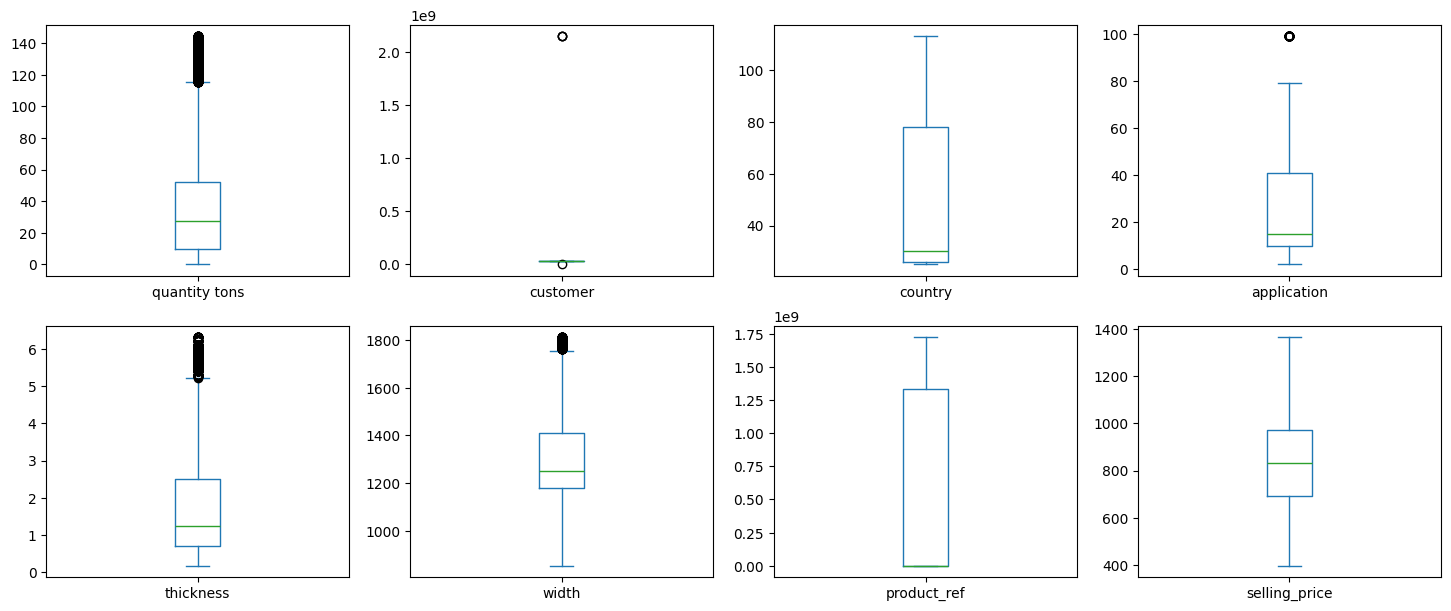

In [41]:
out_skew_data.plot(kind='box',subplots=True,layout=(4,4),figsize=(18,15))
plt.show


C:\Users\tpsna\AppData\Local\Temp\ipykernel_9648\3635200171.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(out_skew_data[column], kde=True, ax=axes[i])
C:\Users\tpsna\AppData\Local\Temp\ipykernel_9648\3635200171.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(out_skew_data[column], kde=

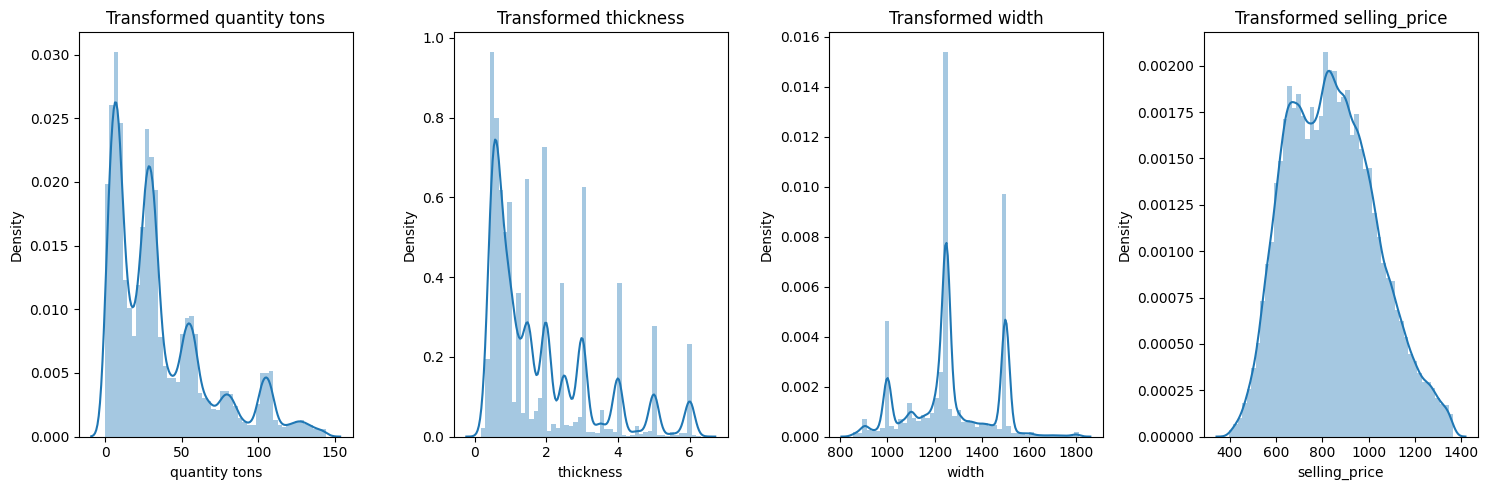

In [42]:
outlier_columns = ['quantity tons', 'thickness', 'width', 'selling_price']

# Plot the histograms of the transformed data
fig, axes = plt.subplots(1, 4,figsize=(15, 5))
axes = axes.flatten()
for i, column in enumerate(outlier_columns):
    sns.distplot(out_skew_data[column], kde=True, ax=axes[i])
    axes[i].set_title(f"Transformed {column}")

plt.tight_layout()
plt.show()

In [44]:
numeric_columns = out_skew_data.select_dtypes(include=['number'])
# to Calculate skewness for numeric columns
skewness_values = numeric_columns.skew()
print(skewness_values)

quantity tons      1.239223
customer         210.220811
country            0.700979
application        0.684824
thickness          1.276129
width              0.057992
product_ref        0.983758
selling_price      0.310072
dtype: float64


Here are some guidelines for interpreting skewness values:

Skewness value close to 0: The distribution is approximately symmetrical.
Skewness value between -0.5 and -1 or between 0.5 and 1: The distribution is moderately skewed.
Skewness value less than -1 or greater than 1: The distribution is highly skewed.

FEATURE ENGINEERING:

In [26]:
skewed_data=out_skew_data.copy(True)
skewed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   item_date      181673 non-null  object 
 1   quantity tons  181669 non-null  float64
 2   customer       181673 non-null  float64
 3   country        181673 non-null  int64  
 4   status         181673 non-null  object 
 5   item type      181673 non-null  object 
 6   application    181673 non-null  float64
 7   thickness      181673 non-null  float64
 8   width          181673 non-null  float64
 9   material_ref   181673 non-null  object 
 10  product_ref    181673 non-null  int64  
 11  delivery date  181673 non-null  object 
 12  selling_price  181666 non-null  float64
dtypes: float64(6), int64(2), object(5)
memory usage: 18.0+ MB


In [79]:
# Ensure the date columns are in datetime format
skewed_data['item_date'] = pd.to_datetime(skewed_data['item_date'])
skewed_data['delivery date'] = pd.to_datetime(skewed_data['delivery date'])

skewed_data['delivery_time_taken'] = (skewed_data['item_date'] - skewed_data['delivery date']).abs().dt.days

skewed_data.head()


,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,delivery_time_taken
0,2021-04-01,54.151139,30156308.0,28,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.0,91
7,2021-04-01,113.387124,30342192.0,32,Won,W,41.0,0.68,1220.0,DX51D+Z,611993,2021-01-01,931.0,90
8,2021-04-01,69.071853,30341428.0,38,Won,S,10.0,0.60,1275.0,DX51D+Z,1668701376,2021-07-01,1363.0,91
11,2021-04-01,113.995666,30342192.0,32,Won,W,41.0,0.55,1220.0,DX51D+Z,611993,2021-01-01,954.0,90
12,2021-04-01,27.512545,30165529.0,78,Won,W,10.0,0.75,1250.0,DX51D+Z,164141591,2021-07-01,1098.0,91


In [80]:
x=skewed_data[['application','thickness','width','selling_price','quantity tons','country','customer','product_ref','delivery_time_taken']].corr()


<Axes: >

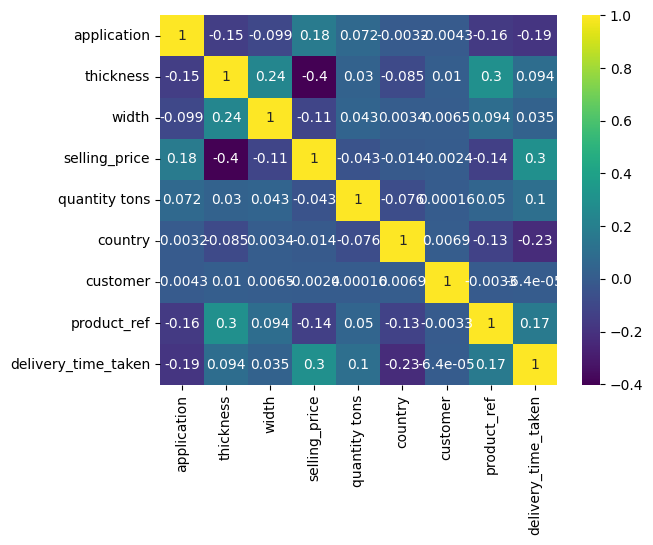

In [81]:
#Heatmap to find the correlation
sns.heatmap(x, annot=True, cmap="viridis")

In [85]:
#Finding the Unique Values:
skewed_data['country'] = skewed_data['country'].astype(str)
country=skewed_data['country'].unique()
status=skewed_data['status'].unique()
item=skewed_data['item type'].unique()
print(country)
print(status)
print(item)

['28' '32' '38' '78' '27' '30' '25' '77' '39' '40' '26' '84' '80' '79'
 '113' '89']
['Won' 'To be approved' 'Lost' 'Not lost for AM' 'Wonderful' 'Revised'
 'Offered' 'Offerable']
['W' 'S' 'Others' 'PL' 'WI' 'IPL']


In [88]:
skewed_data.isna().sum()

item_date              0
quantity tons          0
customer               0
country                0
status                 0
item type              0
application            0
thickness              0
width                  0
material_ref           0
product_ref            0
delivery date          0
selling_price          0
delivery_time_taken    0
dtype: int64

In [31]:
skewed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   item_date      181673 non-null  object 
 1   quantity tons  181669 non-null  float64
 2   customer       181673 non-null  float64
 3   country        181673 non-null  int64  
 4   status         181673 non-null  object 
 5   item type      181673 non-null  object 
 6   application    181673 non-null  float64
 7   thickness      181673 non-null  float64
 8   width          181673 non-null  float64
 9   material_ref   181673 non-null  object 
 10  product_ref    181673 non-null  int64  
 11  delivery date  181673 non-null  object 
 12  selling_price  181666 non-null  float64
dtypes: float64(6), int64(2), object(5)
memory usage: 18.0+ MB


In [108]:
#Encoding the categorical column:
encode=LabelEncoder()
encode_country=encode.fit(country)
transformed_country = encode_country.transform(country)

encode=LabelEncoder()
encode_status=encode.fit(status)
transformed_status = encode_status.transform(status)

encode=LabelEncoder()
encode_item=encode.fit(item)
transformed_item = encode_item.transform(item)

print(transformed_country)
print(transformed_status)
print(transformed_item)


[ 4  6  7 11  3  5  1 10  8  9  2 14 13 12  0 15]
[6 5 0 1 7 4 3 2]
[4 3 1 2 5 0]


In [109]:
for i, j in zip(status, transformed_status):
    print('before encoding :',i,'--- encoded :',j)

before encoding : Won --- encoded : 6
before encoding : To be approved --- encoded : 5
before encoding : Lost --- encoded : 0
before encoding : Not lost for AM --- encoded : 1
before encoding : Wonderful --- encoded : 7
before encoding : Revised --- encoded : 4
before encoding : Offered --- encoded : 3
before encoding : Offerable --- encoded : 2


In [52]:

file_path='country.pkl'
file_path2='status.pkl'
file_path3='item type.pkl'

with open(file_path, 'wb') as file:
    pickle.dump(encode_country, file)
with open(file_path2, 'wb') as file:
    pickle.dump(encode_status, file)
with open(file_path3, 'wb') as file:
    pickle.dump(encode_item, file)

print(f'Pickle file created: {file_path}, {file_path2},{file_path3}')


Pickle file created: country.pkl, status.pkl,item type.pkl


In [53]:
with open('status.pkl', 'rb') as file:
    encode_status = pickle.load(file)
    
transformed_status = encode_status.transform(status)
transformed_status


array([6, 5, 0, 1, 7, 4, 3, 2])

In [54]:
#Regression Model for Finding Selling Price
category_col=['status', 'item type','country']
encoder= LabelEncoder()
for i in category_col:
    print(i)
    skewed_data[i] = encoder.fit_transform(skewed_data[i])
    print(skewed_data[i].unique())

skewed_data.head()


status
[6 5 0 1 7 4 3 2]
item type
[4 3 1 2 5 0]
country
[ 4  6  7 11  3  5  1 10  8  9  2 14 13 12  0 15]


,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,delivery_time_taken
0,2021-04-01,54.151139,30156308.0,4,6,4,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.0,91
7,2021-04-01,113.387124,30342192.0,6,6,4,41.0,0.68,1220.0,DX51D+Z,611993,2021-01-01,931.0,90
8,2021-04-01,69.071853,30341428.0,7,6,3,10.0,0.60,1275.0,DX51D+Z,1668701376,2021-07-01,1363.0,91
11,2021-04-01,113.995666,30342192.0,6,6,4,41.0,0.55,1220.0,DX51D+Z,611993,2021-01-01,954.0,90
12,2021-04-01,27.512545,30165529.0,11,6,4,10.0,0.75,1250.0,DX51D+Z,164141591,2021-07-01,1098.0,91


In [55]:
X = skewed_data[[ 'quantity tons','thickness','width','country','status','item type', 'application','product_ref','delivery_time_taken']].values
y = skewed_data[['selling_price']].values

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
file_path6='scaling.pkl'
with open(file_path6, 'wb') as file:
    pickle.dump(scaler, file)
print(f'Pickle file created: {file_path6}')

Pickle file created: scaling.pkl


REGRESSION MODEL:

In [56]:

feature_cols = ['quantity tons', 'thickness', 'width', 'country', 'status', 'item type', 'application', 'product_ref', 'delivery_time_taken']
target_col = 'selling_price'

X = skewed_data[feature_cols]
y = skewed_data[target_col]

numerical_features = ['quantity tons', 'thickness', 'width', 'delivery_time_taken']
categorical_features = ['country', 'status', 'item type', 'application', 'product_ref']

numerical_transformer = StandardScaler()

categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the model
model = LinearRegression()

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 16338.746438448605
R^2 Score: 0.5437063357219243


CLASSIFICATION MODEL:

In [43]:

feature_columns = ['quantity tons', 'thickness', 'width', 'country', 'selling_price', 'item type', 'application', 'product_ref']
if 'delivery_time_taken' in skewed_data.columns:
    feature_columns.append('delivery_time_taken')

X = skewed_data[feature_columns]
y = skewed_data['status']

def preprocess_target(status):
    if status == 'Won':
        return 1  # WON
    elif status == 'Lost':
        return 0  # LOST
    else:
        return np.nan  

y = y.apply(preprocess_target)

valid_indices = ~y.isna()
X = X[valid_indices]
y = y[valid_indices]

print("Number of NaN values in each column before imputation:")
print(X.isna().sum())

for column in X.columns:
    if X[column].dtype == 'object':
        X[column] = X[column].fillna(X[column].mode()[0])
    else:
        X[column] = X[column].fillna(X[column].median())

print("Number of NaN values in each column after imputation:")
print(X.isna().sum())

X = pd.get_dummies(X, drop_first=True)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Columns in skewed_data: Index(['item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price'],
      dtype='object')
Number of NaN values in each column before imputation:
quantity tons    3
thickness        0
width            0
country          0
selling_price    5
item type        0
application      0
product_ref      0
dtype: int64
Number of NaN values in each column after imputation:
quantity tons    0
thickness        0
width            0
country          0
selling_price    0
item type        0
application      0
product_ref      0
dtype: int64
Accuracy: 0.7685942173479561
Classification Report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      6963
         1.0       0.77      1.00      0.87     23127

    accuracy                           0.77     30090
   macro avg       0.38      0.50      0.43 

c:\Users\tpsna\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\tpsna\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\tpsna\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo